In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
major_road_data = pd.read_csv('datasets/laei-2019-major-roads-vkm-flows-speeds.csv');
nox_road_emission = pd.read_csv('datasets/2019_NOx Road Link Emissions.csv');

/var/folders/fr/t0l0ftns0d9gzgf0r_s11r0c0000gn/T/ipykernel_23631/791119485.py:1: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  major_road_data = pd.read_csv('datasets/laei-2019-major-roads-vkm-flows-speeds.csv');


In [3]:
major_road_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79437 entries, 0 to 79436
Data columns (total 48 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Year                                             79437 non-null  int64 
 1   TOID                                             79437 non-null  object
 2   LAEI Zone                                        79437 non-null  object
 3   Borough                                          79437 non-null  object
 4   Road Classification                              79437 non-null  object
 5    AADT Motorcycle                                 79437 non-null  object
 6    AADT Taxi                                       79437 non-null  object
 7    AADT Petrol Car                                 79437 non-null  object
 8    AADT Diesel Car                                 79437 non-null  object
 9    AADT Electric Car                     

In [4]:
major_road_data.head(5)

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,"5,470","3,780",32,...,50,"3,659",736,"1,451",531,"2,759","3,659",-,327,"231,749"
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,"3,049","2,107",18,...,78,"1,718",344,687,258,"1,289","1,718",-,"1,160","295,268"
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,"5,752","3,976",34,...,57,"1,377",275,551,192,"1,042","1,377",-,"7,746","158,880"
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,"7,280","5,031",43,...,"2,066","63,666","12,679","25,359","9,172","48,019","63,396",-,"97,388","4,851,571"
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,"8,433","5,828",50,...,11,465,94,185,67,352,465,-,446,"43,270"


In [5]:
#Clean the data
cleaned_majorRD_data = major_road_data.apply(lambda col: col.astype(str).str.replace(',', '').str.strip(), axis=0)
#conver the datatypes to numeric
col_to_convert = cleaned_majorRD_data.columns[5:]
cleaned_majorRD_data[col_to_convert] = cleaned_majorRD_data[col_to_convert].apply(pd.to_numeric, errors='coerce')
#clean the titiles
cleaned_majorRD_data.columns = cleaned_majorRD_data.columns.str.strip()
cleaned_majorRD_data.head(5)

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112.0,15.0,5470.0,3780.0,32.0,...,50.0,3659.0,736.0,1451.0,531.0,2759.0,3659.0,NaN,327.0,231749.0
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68.0,10.0,3049.0,2107.0,18.0,...,78.0,1718.0,344.0,687.0,258.0,1289.0,1718.0,NaN,1160.0,295268.0
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131.0,15.0,5752.0,3976.0,34.0,...,57.0,1377.0,275.0,551.0,192.0,1042.0,1377.0,NaN,7746.0,158880.0
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178.0,14.0,7280.0,5031.0,43.0,...,2066.0,63666.0,12679.0,25359.0,9172.0,48019.0,63396.0,NaN,97388.0,4851571.0
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178.0,34.0,8433.0,5828.0,50.0,...,11.0,465.0,94.0,185.0,67.0,352.0,465.0,NaN,446.0,43270.0


In [6]:
nox_road_emission.head(5)

,TOID,pollutant,Road-Car-Petrol-2019,Road-Car-Diesel-2019,Road-Car-Electric-2019,Road-PHV-Petrol-2019,Road-PHV-Diesel-2019,Road-PHV-Electric-2019,Road-LGV-Petrol-2019,Road-LGV-Diesel-2019,Road-LGV-Electric-2019,Road-HGV-Rigid-2019,Road-HGV-Articulated-2019,Road-TfL-Bus-2019,Road-Non-TfL-Bus-or-Coach-2019,Road-Taxi-2019,Road-Motorcycle-2019,Road-Total-2019
0,osgb4000000027865913,nox,1.590568,6.993015,0.0,0.030372,0.214953,0.0,0.008550,6.882164,0.0,0.858378,0.674338,0.0,0.448031,0.030217,0.077711,17.808298
1,osgb4000000027865914,nox,1.565236,7.108021,0.0,0.034120,0.250065,0.0,0.010989,9.392835,0.0,1.042228,0.819567,0.0,0.503748,0.050126,0.083772,20.860706
2,osgb4000000027865915,nox,1.031740,10.018715,0.0,0.079560,0.540788,0.0,0.010269,9.835178,0.0,1.771826,2.681607,0.0,0.247354,0.045132,0.059342,26.321512
3,osgb4000000027865916,nox,1.146019,11.792383,0.0,0.075438,0.537094,0.0,0.010219,10.886653,0.0,1.955103,2.958598,0.0,0.258160,0.035638,0.076658,29.731963
4,osgb4000000027865917,nox,0.686157,6.986898,0.0,0.044834,0.316394,0.0,0.007327,7.658349,0.0,1.094813,1.657397,0.0,0.188234,0.039542,0.045465,18.725408


In [7]:
nox_road_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79439 entries, 0 to 79438
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TOID                            79439 non-null  object 
 1   pollutant                       79439 non-null  object 
 2   Road-Car-Petrol-2019            79381 non-null  float64
 3   Road-Car-Diesel-2019            79381 non-null  float64
 4   Road-Car-Electric-2019          79381 non-null  float64
 5   Road-PHV-Petrol-2019            79381 non-null  float64
 6   Road-PHV-Diesel-2019            79381 non-null  float64
 7   Road-PHV-Electric-2019          79381 non-null  float64
 8   Road-LGV-Petrol-2019            79381 non-null  float64
 9   Road-LGV-Diesel-2019            79381 non-null  float64
 10  Road-LGV-Electric-2019          79381 non-null  float64
 11  Road-HGV-Rigid-2019             79381 non-null  float64
 12  Road-HGV-Articulated-2019       

In [8]:
#filter the columns to keep the first three coulmns and the columns that contain 2019
columns_to_keep = nox_road_emission.columns[:3].tolist() + [col for col in nox_road_emission.columns if "2019" in col]
nox_2019_road_emission = nox_road_emission[columns_to_keep]
nox_2019_road_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79439 entries, 0 to 79438
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TOID                            79439 non-null  object 
 1   pollutant                       79439 non-null  object 
 2   Road-Car-Petrol-2019            79381 non-null  float64
 3   Road-Car-Petrol-2019            79381 non-null  float64
 4   Road-Car-Diesel-2019            79381 non-null  float64
 5   Road-Car-Electric-2019          79381 non-null  float64
 6   Road-PHV-Petrol-2019            79381 non-null  float64
 7   Road-PHV-Diesel-2019            79381 non-null  float64
 8   Road-PHV-Electric-2019          79381 non-null  float64
 9   Road-LGV-Petrol-2019            79381 non-null  float64
 10  Road-LGV-Diesel-2019            79381 non-null  float64
 11  Road-LGV-Electric-2019          79381 non-null  float64
 12  Road-HGV-Rigid-2019             

In [9]:
nox_2019_road_emission.shape

(79439, 19)

In [10]:
major_road_data.shape

(79437, 48)

In [11]:
nox_all_data = pd.merge(cleaned_majorRD_data,nox_2019_road_emission, on ='TOID', how='left')
nox_all_data.head(10)

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,Road-LGV-Petrol-2019,Road-LGV-Diesel-2019,Road-LGV-Electric-2019,Road-HGV-Rigid-2019,Road-HGV-Articulated-2019,Road-TfL-Bus-2019,Road-Non-TfL-Bus-or-Coach-2019,Road-Taxi-2019,Road-Motorcycle-2019,Road-Total-2019
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112.0,15.0,5470.0,3780.0,32.0,...,0.000034,0.026410,0.0,0.004145,0.005330,0.000000,0.000410,0.000381,0.000581,0.086293
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68.0,10.0,3049.0,2107.0,18.0,...,0.000044,0.030177,0.0,0.003216,0.004716,0.000000,0.002689,0.000386,0.000324,0.103534
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131.0,15.0,5752.0,3976.0,34.0,...,0.000036,0.027459,0.0,0.005397,0.008571,0.000000,0.039316,0.000199,0.000173,0.123533
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178.0,14.0,7280.0,5031.0,43.0,...,0.001196,0.843562,0.0,0.144806,0.218329,0.000000,0.278002,0.003557,0.004968,2.470365
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178.0,34.0,8433.0,5828.0,50.0,...,0.000008,0.005656,0.0,0.000531,0.000682,0.000000,0.000578,0.000095,0.000102,0.016326
5,2019,osgb4000000030400377,Non-GLA,Non-GLA,A Road,74.0,18.0,3477.0,2403.0,21.0,...,0.000009,0.005932,0.0,0.001331,0.001972,0.004547,0.000537,0.000132,0.000064,0.027376
6,2019,osgb4000000030120416,Non-GLA,Non-GLA,A Road,175.0,17.0,7715.0,5332.0,46.0,...,0.000178,0.118875,0.0,0.023145,0.032293,0.000000,0.003944,0.000752,0.001196,0.332630
7,2019,osgb4000000027908741,Non-GLA,Non-GLA,A Road,47.0,8.0,2246.0,1552.0,13.0,...,0.000017,0.011062,0.0,0.000628,0.000879,0.000000,0.000530,0.000132,0.000120,0.029807
8,2019,osgb4000000027869098,Non-GLA,Non-GLA,A Road,385.0,41.0,15431.0,10664.0,91.0,...,0.003332,2.234839,0.0,0.539790,0.768029,0.000000,0.727636,0.014045,0.018709,6.795513
9,2019,osgb4000000030398233,Non-GLA,Non-GLA,A Road,188.0,29.0,9672.0,6684.0,57.0,...,0.000019,0.015430,0.0,0.001602,0.002601,0.000000,0.030030,0.000326,0.000209,0.111343


In [12]:
nox_all_data.shape

(79437, 66)

In [13]:
nox_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79437 entries, 0 to 79436
Data columns (total 66 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           79437 non-null  object 
 1   TOID                                           79437 non-null  object 
 2   LAEI Zone                                      79437 non-null  object 
 3   Borough                                        79437 non-null  object 
 4   Road Classification                            79437 non-null  object 
 5   AADT Motorcycle                                78672 non-null  float64
 6   AADT Taxi                                      77766 non-null  float64
 7   AADT Petrol Car                                78170 non-null  float64
 8   AADT Diesel Car                                78170 non-null  float64
 9   AADT Electric Car                              781

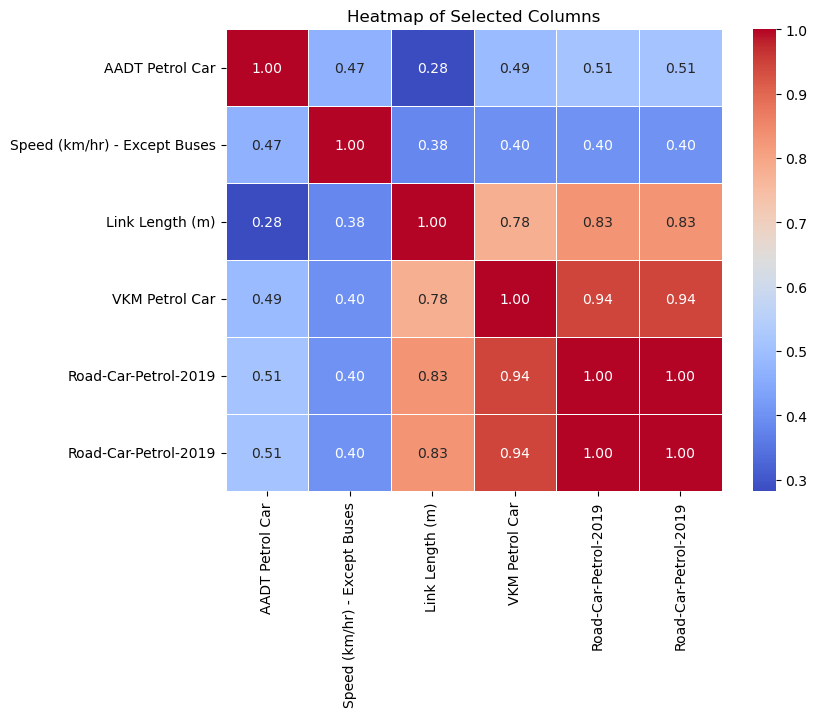

In [14]:
columns_of_interest = [
    'AADT Petrol Car',
    'Speed (km/hr) - Except Buses',
    'Link Length (m)',
    'VKM Petrol Car',
    'Road-Car-Petrol-2019'
]

heatmap_data = nox_all_data[columns_of_interest].dropna()
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()

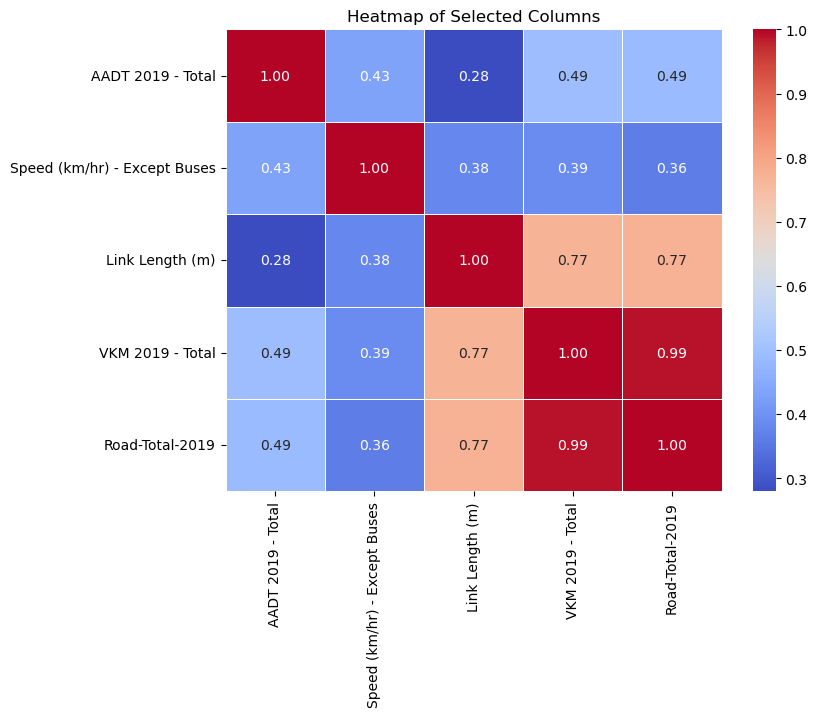

In [15]:
columns_of_interest = [
    'AADT 2019 - Total',
    'Speed (km/hr) - Except Buses',
    'Link Length (m)',
    'VKM 2019 - Total',
    'Road-Total-2019'
]

heatmap_data = nox_all_data[columns_of_interest].dropna()
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()